In [1]:
import numpy as np
import numpy.linalg as la
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import sqrt
from matplotlib import rc
import matplotlib as mpl
# activate latex text rendering
# rc('text', usetex=True)
# mpl.rcParams['pdf.fonttype'] = 42
import warnings
warnings.filterwarnings("error")


In [2]:
loss_star = np.load("100d_constant_simplex_1m_loss_star.npy")
constant_loss = np.load("100d_constant_simplex_1m_loss.npy")
constant_x = np.load("100d_constant_simplex_1m_x_diff.npy")
constant_x_minus_bar = np.load("100d_constant_simplex_1m_x_minus_bar.npy")

proposed_loss = np.load("100d_simplex_1m_loss.npy")
proposed_x = np.load("100d_simplex_1m_x_diff.npy")
proposed_x_minus_bar = np.load("100d_simplex_1m_x_minus_bar.npy")

diminish_loss = np.load("100d_diminishing_simplex_1m_loss.npy")
diminish_x = np.load("100d_diminishing_simplex_1m_x_diff.npy")
diminish_x_minus_bar = np.load("100d_diminishing_simplex_1m_x_minus_bar.npy")

iter_num = 200000
x_basis = np.linspace(0, iter_num/1000, iter_num, endpoint=False)
print(diminish_x.shape)

(1000000,)


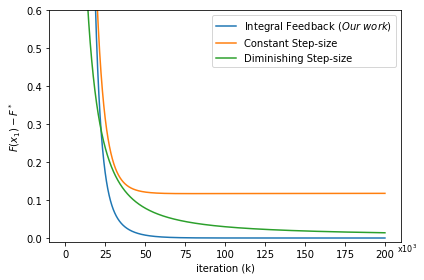

In [3]:
# mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()


# for i in range(1):
i=1    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
proposedloss_x = (proposed_loss[i,:]-loss_star)
diminishloss_x = (diminish_loss[i,:]-loss_star)
loss_x = (constant_loss[i,:]-loss_star)

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(x_basis, (proposedloss_x[:iter_num]), label=r'Integral Feedback ${(Our\ work)}$')
plt.plot(x_basis, (loss_x[:iter_num]), label='Constant Step-size')
plt.plot(x_basis, (diminishloss_x[:iter_num]), label='Diminishing Step-size')
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.plot(loss_x2_k2[1:])
plt.ylim((-0.01,0.6))
plt.xlabel('iteration (k)')
plt.ylabel('$F(x_1) - F^*$')


plt.legend(loc='upper right')

ax.annotate('x$10^3$', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)
plt.tight_layout()

# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")
plt.savefig('comparison.pdf', format='pdf')


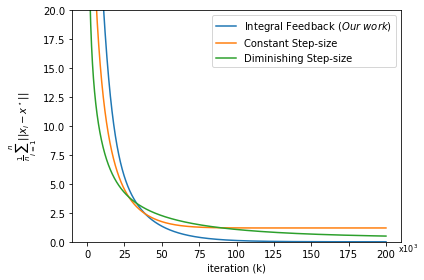

In [4]:
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()
# iter_num = 1000
# x_basis = np.linspace(0, iter_num/1000, iter_num, endpoint=False)

# for i in range(1):
# #     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
# proposed_x = (proposed_x[i,:])
# diminish_x = (diminish_x[i,:])
# constant_x = (constant_x[i,:])

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(x_basis, (proposed_x[:iter_num]), label=r'Integral Feedback ${(Our\ work)}$')
plt.plot(x_basis, (constant_x[:iter_num]), label='Constant Step-size')
plt.plot(x_basis, (diminish_x[:iter_num]), label='Diminishing Step-size')
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.plot(loss_x2_k2[1:])
plt.ylim((0,20))
plt.xlabel('iteration (k)')
plt.ylabel(r'$ \frac{1}{n}\sum_{i=1}^n \|\| x_i - x^\star \|\|$')


plt.legend(loc='upper right')

ax.annotate('x$10^3$', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)
plt.tight_layout()

# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")
plt.savefig('x_diff.pdf', format='pdf')


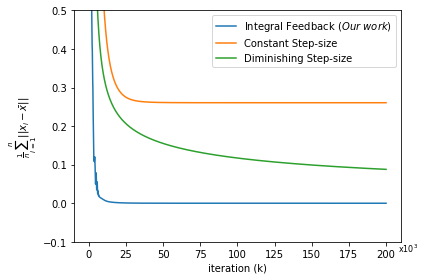

In [5]:
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()
iter_num = 200000
x_basis = np.linspace(0, iter_num/1000, iter_num, endpoint=False)

# for i in range(1):
# #     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
# proposed_x = (proposed_x[i,:])
# diminish_x = (diminish_x[i,:])
# constant_x = (constant_x[i,:])

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(x_basis, (proposed_x_minus_bar[:iter_num]), label=r'Integral Feedback ${(Our\ work)}$')
plt.plot(x_basis, (constant_x_minus_bar[:iter_num]), label='Constant Step-size')
plt.plot(x_basis, (diminish_x_minus_bar[:iter_num]), label='Diminishing Step-size')
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.plot(loss_x2_k2[1:])
plt.ylim((-0.1,0.5))
plt.xlabel('iteration (k)')
plt.ylabel(r'$ \frac{1}{n}\sum_{i=1}^n \|\| x_i - \bar{x} \|\|$')


plt.legend(loc='upper right')

ax.annotate('x$10^3$', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)


plt.tight_layout()

# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")
plt.savefig('x_minus_bar.pdf', format='pdf')


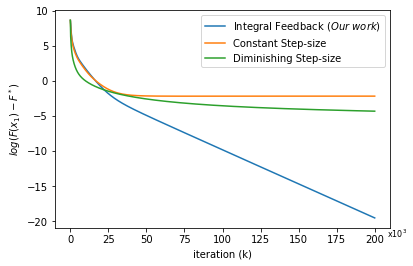

In [6]:
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()

#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
proposedloss_x = (proposed_loss[i,:]-loss_star)
diminishloss_x = (diminish_loss[i,:]-loss_star)
loss_x = (constant_loss[i,:]-loss_star)

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(x_basis, np.log(proposedloss_x[:iter_num]), label=r'Integral Feedback ${(Our\ work)}$')
plt.plot(x_basis, np.log(loss_x[:iter_num]), label='Constant Step-size')
plt.plot(x_basis, np.log(diminishloss_x[:iter_num]), label='Diminishing Step-size')
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.plot(loss_x2_k2[1:])
# plt.ylim((-0.01,0.6))
plt.xlabel('iteration (k)')
plt.ylabel('$log(F(x_1) - F^*)$')
ax.annotate('x$10^3$', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)


plt.legend(loc='upper right')
# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")
# plt.savefig("comparison_1m_simplex_(local_loss-loss_star)")
plt.savefig('log_comparison.pdf', format='pdf')


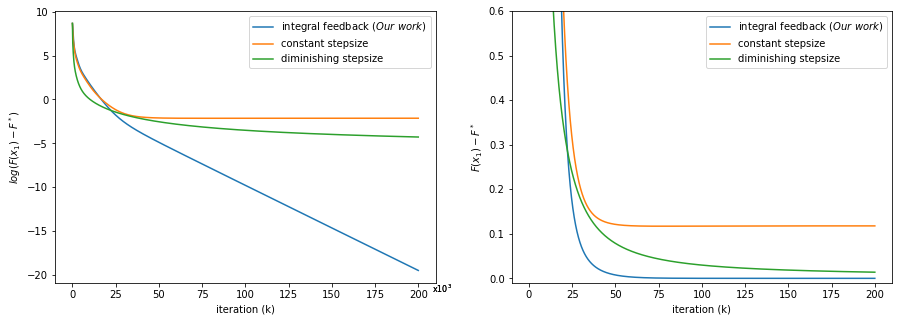

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()

#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
proposedloss_x = (proposed_loss[i,:]-loss_star)
diminishloss_x = (diminish_loss[i,:]-loss_star)
loss_x = (constant_loss[i,:]-loss_star)

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(x_basis, np.log(proposedloss_x[:iter_num]), label=r'integral feedback ${(Our\ work)}$')
plt.plot(x_basis, np.log(loss_x[:iter_num]), label='constant stepsize')
plt.plot(x_basis, np.log(diminishloss_x[:iter_num]), label='diminishing stepsize')

plt.xlabel('iteration (k)')
plt.ylabel('$log(F(x_1) - F^*)$')
ax.annotate('x$10^3$', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)


plt.legend(loc='upper right')


plt.subplot(122)
# mpl.rcParams['pdf.fonttype'] = 42

# ax = plt.gca()


# for i in range(1):
i=1    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
proposedloss_x = (proposed_loss[i,:]-loss_star)
diminishloss_x = (diminish_loss[i,:]-loss_star)
loss_x = (constant_loss[i,:]-loss_star)

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(x_basis, (proposedloss_x[:iter_num]), label=r'integral feedback ${(Our\ work)}$')
plt.plot(x_basis, (loss_x[:iter_num]), label='constant stepsize')
plt.plot(x_basis, (diminishloss_x[:iter_num]), label='diminishing stepsize')
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.plot(loss_x2_k2[1:])
plt.ylim((-0.01,0.6))
plt.xlabel('iteration (k)')
plt.ylabel('$F(x_1) - F^*$')


plt.legend(loc='upper right')

ax.annotate('x$10^3$', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)


plt.show()